In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
file_path = 'foodrecmergedallergen.xlsx'
data = pd.read_excel(file_path)

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(data[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Train KNN Model
knn = NearestNeighbors(n_neighbors=9, metric='euclidean')
knn.fit(X_numerical)


def recommend_recipes(input_features, user_allergy):
    # Scale the numerical features
    input_features_scaled = scaler.transform([input_features])
    
    # Get KNN recommendations
    distances, indices = knn.kneighbors(input_features_scaled)
    recommendations = data.iloc[indices[0]]
    filtered_recommendations = recommendations[~recommendations['Food_allergy'].str.contains(user_allergy, case=False, na=False)]
    return filtered_recommendations[['Food_items']]
input_features = [540, 16, 10,400,10,7,90,80,10,2,90]
recommendations = recommend_recipes(input_features,'Gluten')

recommendations
#this is good

C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Food_items
187,Macroni n Cheese
328,Uttapam
75,Cereals-Corn Flakes
169,Idli
41,Berries
73,Cashew Nuts
251,Protein Powder
82,Chia seeds


Available Columns in Recommendations DataFrame: Index(['Food_items', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium',
       'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars'],
      dtype='object')


C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


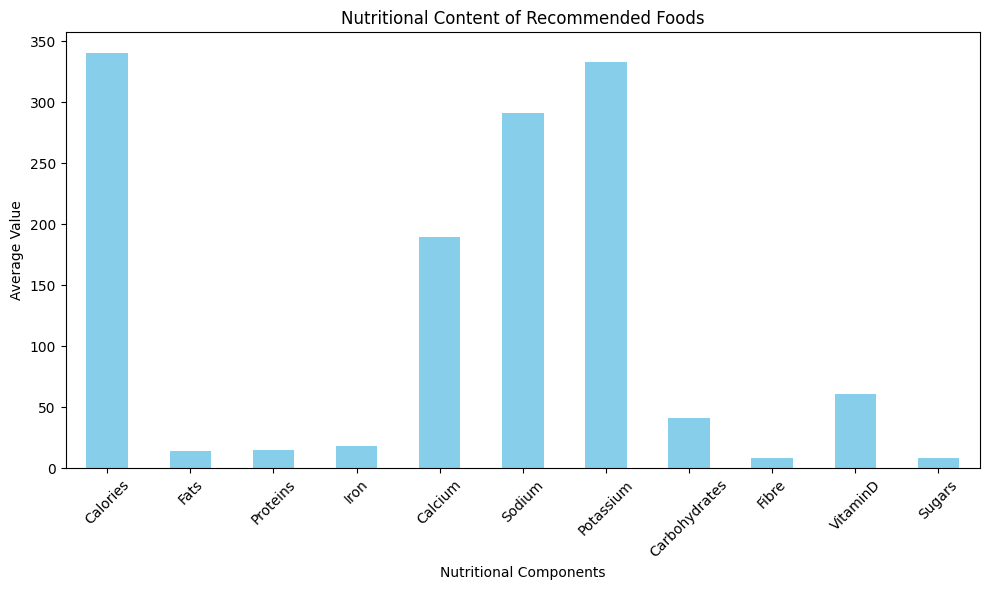

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'foodrecmergedallergen.xlsx'
data = pd.read_excel(file_path)

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(data[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Train KNN Model
knn = NearestNeighbors(n_neighbors=9, metric='euclidean')
knn.fit(X_numerical)

# Function to recommend recipes based on input features and user allergy
def recommend_recipes(input_features, user_allergy):
    # Scale the numerical features
    input_features_scaled = scaler.transform([input_features])
    
    # Get KNN recommendations
    distances, indices = knn.kneighbors(input_features_scaled)
    recommendations = data.iloc[indices[0]]
    
    # Filter out recommendations based on the user's allergy
    filtered_recommendations = recommendations[~recommendations['Food_allergy'].str.contains(user_allergy, case=False, na=False)]
    
    return filtered_recommendations[['Food_items', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']]

# Define the input features
input_features = [540, 16, 10, 400, 10, 7, 90, 80, 10, 2, 90]

# Get the recommended recipes based on the input features and allergy
recommendations = recommend_recipes(input_features, 'Gluten')

# Debug: Check the available columns in the recommendations DataFrame
print("Available Columns in Recommendations DataFrame:", recommendations.columns)

# Function to plot the nutritional content of the recommended foods
def plot_nutritional_content(recommendations, nutritional_columns):
    # Debug: Check if the required nutritional columns are in the recommendations DataFrame
    missing_columns = [col for col in nutritional_columns if col not in recommendations.columns]
    if missing_columns:
        print(f"Warning: Missing columns in the recommendations: {missing_columns}")
    
    # Select the relevant nutritional columns for the plot (only those that exist in the recommendations DataFrame)
    nutritional_values = recommendations[nutritional_columns].mean()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    nutritional_values.plot(kind='bar', color='skyblue')
    plt.title('Nutritional Content of Recommended Foods')
    plt.xlabel('Nutritional Components')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Define the nutritional columns to be visualized
nutritional_columns = ['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']

# Call the plot function with the recommended data
plot_nutritional_content(recommendations, nutritional_columns)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'foodrecmergedallergen.xlsx'
recipe_df = pd.read_excel(file_path)

# Example User Allergy List
user_allergies = ['Gluten']  # Replace with actual user allergies

# Fill NaN values in 'Food_allergy' with 'Unknown'
recipe_df['Food_allergy'].fillna('Unknown', inplace=True)


# Feature extraction for ingredients and nutritional values
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['Food_items'])

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Combine Features
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])
y = recipe_df['Food_allergy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train KNN Classifier Model
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean') #57%accuracy
#knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance') 63% accuracy

knn_classifier.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")


KNN Model Accuracy: 0.59


C:\Users\molly\AppData\Local\Temp\ipykernel_21332\2366502366.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recipe_df['Food_allergy'].fillna('Unknown', inplace=True)


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'foodrecmergedallergen.xlsx'
recipe_df = pd.read_excel(file_path)

# Example User Allergy List
user_allergies = ['Gluten']  # Replace with actual user allergies

# Fill NaN values in 'Food_allergy' with 'Unknown'
recipe_df['Food_allergy'] = recipe_df['Food_allergy'].fillna('Unknown')

# Check the class distribution
print(recipe_df['Food_allergy'].value_counts())

# Remove classes with very few samples (e.g., less than 5)
min_class_count = 5  # Set the threshold for the minimum number of samples per class
class_counts = recipe_df['Food_allergy'].value_counts()
minority_classes = class_counts[class_counts < min_class_count].index
recipe_df = recipe_df[~recipe_df['Food_allergy'].isin(minority_classes)]

# Feature extraction for ingredients and nutritional values
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['Food_items'])

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Combine Features
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])
y = recipe_df['Food_allergy']

# Apply SMOTE for class balancing (now should work as we've removed small classes)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_combined, y)

# Apply PCA for dimensionality reduction (optional but can improve model performance)
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_resampled = pca.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train KNN Classifier Model with optimized hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn_classifier.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")

# Optionally, perform cross-validation to get a better estimate of accuracy
cv_scores = cross_val_score(knn_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")

def recommend_recipes(input_features, user_allergy, scaler, vectorizer, knn_classifier, pca, recipe_df):
    # Step 1: Extract and reshape the input nutritional data
    nutritional_input = np.array(input_features).reshape(1, -1)  # Nutritional features (1 sample)
    
    # Step 2: Scale the nutritional features using the scaler (apply same scaling as during training)
    nutritional_input_scaled = scaler.transform(nutritional_input)
    
    # Step 3: Combine with TF-IDF vector (assuming no ingredients are provided in input)
    ingredients_input = vectorizer.transform(['']).toarray()  # Placeholder for ingredients (empty string or dummy)
    
    # Combine nutritional input and ingredient input
    combined_input = np.hstack([nutritional_input_scaled, ingredients_input])
    
    # Step 4: Apply PCA transformation to match the PCA space used during training
    combined_input_pca = pca.transform(combined_input)
    
    # Step 5: Ensure the PCA-transformed input is within valid range for KNN
    # Here, combined_input_pca is a 1x33 array, corresponding to the number of components in PCA
    # Now we can safely get KNN indices without worrying about out-of-bounds errors
    
    distances, indices = knn_classifier.kneighbors(combined_input_pca)
    
    # Debug: Check the indices returned by KNN
    print(f"KNN indices: {indices}")
    
    # Step 6: Ensure indices are within bounds of the recipe DataFrame
    valid_indices = [i for i in indices[0] if i < len(recipe_df)]  # Only keep valid indices within bounds
    
    if not valid_indices:
        print(f"Error: No valid indices found. Max index is {indices[0].max()}, but recipe_df has {len(recipe_df)} rows.")
        return None
    
    # Filter the recommendations using valid indices
    recommendations = recipe_df.iloc[valid_indices]

    # Step 7: Filter out recipes based on the user's allergy
    filtered_recommendations = recommendations[~recommendations['Food_allergy'].str.contains(user_allergy, case=False, na=False)]

    # Step 8: Return the filtered food items along with allergy information
    return filtered_recommendations[['Food_items', 'Food_allergy']]

# Example Input (Nutritional Features)
# input_features = [500, 160, 1, 300, 110, 679, 8, 8, 1, 2, 90]  # Nutritional features (without ingredients)
# user_allergy = 'Dairy'  # Allergy input from the user
input_features = [540, 16, 10, 400, 10, 7, 90, 80, 10, 2, 90]  # Nutritional features
user_allergy = 'Gluten'  # Allergy input from the user

# Assuming 'scaler', 'vectorizer', 'knn_classifier', and 'pca' are already trained
recommendations = recommend_recipes(input_features, user_allergy, scaler, vectorizer, knn_classifier, pca, recipe_df)
print(recommendations)


#KNN MODEL 


Food_allergy
Unknown                                  175
Dairy                                     61
Gluten                                    41
Dairy, Gluten                             22
Soy                                        7
Shellfish                                  6
Nuts                                       5
Fish                                       4
Dairy, Gluten (pasta)                      3
Gluten, Dairy                              3
Dairy, Gluten (wrap)                       3
Shellfish, Dairy                           2
Dairy, Gluten (bread)                      1
Nuts (Cashews)                             1
Dairy, Gluten (noodles)                    1
Dairy, Gluten (croutons)                   1
Dairy, Gluten (crust)                      1
Eggs, Dairy, Gluten (bread)                1
Fish, Gluten                               1
Dairy, Nuts (if cashews used)              1
Dairy, Gluten (pita)                       1
Gluten (bun)                              

C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest

# Load the dataset
file_path = 'foodrecmergedallergen.xlsx'
recipe_df = pd.read_excel(file_path)

# Example User Allergy List
user_allergies = ['Gluten']  # Replace with actual user allergies

# Fill NaN values in 'Food_allergy' with 'Unknown'
recipe_df['Food_allergy'] = recipe_df['Food_allergy'].fillna('Unknown')

# Check the class distribution
print(recipe_df['Food_allergy'].value_counts())

# Remove classes with very few samples (e.g., less than 5)
min_class_count = 5  # Set the threshold for the minimum number of samples per class
class_counts = recipe_df['Food_allergy'].value_counts()
minority_classes = class_counts[class_counts < min_class_count].index
recipe_df = recipe_df[~recipe_df['Food_allergy'].isin(minority_classes)]

# Feature extraction for ingredients and nutritional values
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['Food_items'])

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Combine Features
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])
y = recipe_df['Food_allergy']

# Apply SMOTE for class balancing (now should work as we've removed small classes)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_combined, y)

# Apply PCA for dimensionality reduction (optional but can improve model performance)
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_resampled = pca.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest Classifier Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest with 100 trees
rf_classifier.fit(X_train, y_train)

# Predict on the test set using Random Forest
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

# Optionally, perform cross-validation to get a better estimate of accuracy for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Random Forest Cross-validation scores: {rf_cv_scores}")
print(f"Mean Random Forest cross-validation accuracy: {rf_cv_scores.mean():.2f}")


def recommend_recipes(input_features, user_allergy, scaler, rf_classifier, pca, recipe_df):
    # Step 1: Extract and reshape the input nutritional data
    nutritional_input = np.array(input_features).reshape(1, -1)  # Nutritional features (no ingredients)
    
    # Step 2: Scale the nutritional features using the scaler (apply same scaling as during training)
    nutritional_input_scaled = scaler.transform(nutritional_input)
    
    # Step 3: Create a dummy ingredient vector (e.g., an empty ingredient vector)
    dummy_ingredient = np.zeros((1, X_ingredients.shape[1]))  # Create a dummy vector with zeros (no ingredients)
    
    # Step 4: Combine the nutritional features and the dummy ingredient vector
    combined_input = np.hstack([nutritional_input_scaled, dummy_ingredient])
    
    # Step 5: Apply PCA transformation to match the PCA space used during training
    combined_input_pca = pca.transform(combined_input)  # Transform using the combined input
    
    # Step 6: Predict using Random Forest classifier (getting the class probabilities for relevance)
    rf_prediction = rf_classifier.predict(combined_input_pca)
    rf_probabilities = rf_classifier.predict_proba(combined_input_pca)
    
    # Debug: Check the Random Forest Prediction and probabilities
    print(f"Random Forest Prediction: {rf_prediction[0]}")
    print(f"Class Probabilities: {rf_probabilities[0]}")
    
    # Step 7: Calculate the "relevance" of each food item to the input nutritional features
    distances = np.linalg.norm(X_resampled - combined_input_pca, axis=1)  # Use resampled data (X_resampled)
    
    # Step 8: Sort food items by relevance (in this case, smallest distance)
    sorted_indices = np.argsort(distances)
    
    # Ensure that we do not exceed the bounds of the DataFrame
    top_n = min(10, len(sorted_indices))  # Take the minimum of 10 or the available number of items
    top_10_indices = sorted_indices[:top_n]
    
    # Debug: Check the top 10 indices to ensure they are valid
    print(f"Top 10 indices: {top_10_indices}")
    print(f"Recipe DataFrame size: {recipe_df.shape[0]}")
    
    # Ensure that indices are within bounds of recipe_df
    top_10_indices = [i for i in top_10_indices if i < recipe_df.shape[0]]
    
    # Get the food items and allergies for the top 10
    recommendations = recipe_df.iloc[top_10_indices]
    
    # Filter based on the user allergy
    filtered_recommendations = recommendations[~recommendations['Food_allergy'].str.contains(user_allergy, case=False, na=False)]
    
    # Step 9: Return the filtered food items along with allergy information
    return filtered_recommendations[['Food_items', 'Food_allergy']]

# Example Input (Nutritional Features only, no ingredients)
input_features = [540, 16, 10, 400, 10, 7, 90, 80, 10, 2, 90]  # Nutritional features
user_allergy = 'Gluten'  # Allergy input from the user

# Assuming 'scaler', 'rf_classifier', and 'pca' are already trained
recommendations = recommend_recipes(input_features, user_allergy, scaler, rf_classifier, pca, recipe_df)
print(recommendations)
#random forest


Food_allergy
Unknown                                  175
Dairy                                     61
Gluten                                    41
Dairy, Gluten                             22
Soy                                        7
Shellfish                                  6
Nuts                                       5
Fish                                       4
Dairy, Gluten (pasta)                      3
Gluten, Dairy                              3
Dairy, Gluten (wrap)                       3
Shellfish, Dairy                           2
Dairy, Gluten (bread)                      1
Nuts (Cashews)                             1
Dairy, Gluten (noodles)                    1
Dairy, Gluten (croutons)                   1
Dairy, Gluten (crust)                      1
Eggs, Dairy, Gluten (bread)                1
Fish, Gluten                               1
Dairy, Nuts (if cashews used)              1
Dairy, Gluten (pita)                       1
Gluten (bun)                              

C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'foodrecmergedallergen.xlsx'
data = pd.read_excel(file_path)

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(data[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Apply KMeans Clustering (Choosing 5 clusters, but can be adjusted)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_numerical)

def recommend_recipes(input_features, user_allergy):
    # Step 1: Scale the input features using the previously fitted scaler
    input_features_scaled = scaler.transform([input_features])
    
    # Step 2: Predict the cluster for the given input
    input_cluster = kmeans.predict(input_features_scaled)[0]
    
    # Step 3: Get recipes from the same cluster
    recommendations = data[data['Cluster'] == input_cluster]
    
    # Step 4: Filter out recipes containing the user's allergy
    filtered_recommendations = recommendations[~recommendations['Food_allergy'].str.contains(user_allergy, case=False, na=False)]
    
    # Step 5: Return the food items in the filtered recommendations
    return filtered_recommendations[['Food_items']]

# Example Input Features (Nutritional values)
input_features = [540, 16, 10, 400, 10, 7, 90, 80, 10, 2, 90]
user_allergy = 'Gluten'  # Allergy to filter out

# Get recommendations based on the input features and allergy
recommendations = recommend_recipes(input_features, user_allergy)

# Display the recommended recipes
print(recommendations)
#kmeans clustering

            Food_items
187  Macroni n Cheese 
328            Uttapam


C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'foodrecmergedallergen.xlsx'
data = pd.read_excel(file_path)

# Normalize Numerical Features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(data[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Apply KMeans Clustering (Choosing 5 clusters, but can be adjusted)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_numerical)

def recommend_recipes(input_features, user_allergy):
    # Step 1: Scale the input features using the previously fitted scaler
    input_features_scaled = scaler.transform([input_features])
    
    # Step 2: Predict the cluster for the given input
    input_cluster = kmeans.predict(input_features_scaled)[0]
    
    # Step 3: Get recipes from the same cluster
    recommendations = data[data['Cluster'] == input_cluster]
    
    # Step 4: Filter out recipes containing the user's allergy
    filtered_recommendations = recommendations[~recommendations['Food_allergy'].str.contains(user_allergy, case=False, na=False)]
    
    # Step 5: Return the food items in the filtered recommendations
    return filtered_recommendations[['Food_items']], input_cluster

def calculate_accuracy(input_features_list, user_allergy):
    predicted_clusters = []
    true_clusters = []
    
    # Loop over input features
    for input_features in input_features_list:
        recommendations, predicted_cluster = recommend_recipes(input_features, user_allergy)
        
        # Get the actual cluster from the dataset by using the KMeans model
        actual_cluster = kmeans.predict([input_features])[0]  # Predict cluster for input features
        
        predicted_clusters.append(predicted_cluster)
        true_clusters.append(actual_cluster)
    
    # Check for NaN values in true_clusters or predicted_clusters and remove them
    valid_indices = ~np.isnan(true_clusters) & ~np.isnan(predicted_clusters)
    true_clusters = np.array(true_clusters)[valid_indices]
    predicted_clusters = np.array(predicted_clusters)[valid_indices]
    
    # Calculate accuracy by comparing predicted clusters with true clusters
    if len(true_clusters) > 0:  # Only calculate accuracy if there are valid entries
        accuracy = accuracy_score(true_clusters, predicted_clusters)
        return accuracy
    else:
        return 0.0

# Example Input Features (Nutritional values)
input_features_list = [
    [540, 16, 10, 400, 10, 7, 90, 80, 10, 2, 90],
    [300, 20, 15, 300, 8, 4, 70, 60, 8, 1, 85],
    # Add more input features here as needed for testing
]

user_allergy = 'Gluten'  # Allergy to filter out

# Calculate accuracy for the given input features
accuracy = calculate_accuracy(input_features_list, user_allergy)

# Print the accuracy
print(f"Accuracy of the clustering-based recommendation system: {accuracy * 100:.2f}%")


Accuracy of the clustering-based recommendation system: 100.00%


C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
# Step 1: Remove small allergy classes (if still needed, otherwise skip this)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

file_path = 'foodrecmergedallergen.xlsx'
recipe_df = pd.read_excel(file_path)
recipe_df['Food_allergy'] = recipe_df['Food_allergy'].fillna('Unknown')

# Step 1: Remove small allergy classes (if still needed, otherwise skip this)
min_class_count = 5  # Set the threshold for the minimum number of samples per class
class_counts = recipe_df['Food_allergy'].value_counts()
minority_classes = class_counts[class_counts < min_class_count].index
recipe_df = recipe_df[~recipe_df['Food_allergy'].isin(minority_classes)]

# Remove any remaining classes with fewer than 2 samples
class_counts = recipe_df['Food_allergy'].value_counts()
minority_classes = class_counts[class_counts < 2].index
recipe_df = recipe_df[~recipe_df['Food_allergy'].isin(minority_classes)]

# Step 2: Filter out rows with empty or missing 'Food_items'
recipe_df = recipe_df[recipe_df['Food_items'].notna() & (recipe_df['Food_items'].str.strip() != '')]

# Step 3: Feature extraction for food items (ingredients) and nutritional values
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['Food_items'])

# Step 4: Normalize Numerical Features (nutritional values)
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']])

# Step 5: Combine Features (nutritional and textual)
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])

# Step 6: Choose the appropriate target variable (e.g., food items or categories)
y = recipe_df['Food_allergy']  # This is the target (allergy classes)

# Step 7: Apply SMOTE for class balancing (optional)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)

# Check for classes with fewer than k_neighbors samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= smote.k_neighbors + 1].index

# Filter out samples from the invalid classes
filtered_data = recipe_df[recipe_df['Food_allergy'].isin(valid_classes)]

# Extract features and target again from the filtered data
X_filtered = filtered_data[['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']]
X_ingredients_filtered = vectorizer.transform(filtered_data['Food_items'])

# Normalize and combine features
X_filtered_numerical = scaler.fit_transform(X_filtered)
X_filtered_combined = np.hstack([X_filtered_numerical, X_ingredients_filtered.toarray()])

y_filtered = filtered_data['Food_allergy']

# Apply SMOTE on the filtered data
X_resampled, y_resampled = smote.fit_resample(X_filtered_combined, y_filtered)

# Step 8: Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_resampled = pca.fit_transform(X_resampled)

# Proceed with the rest of your steps (splitting, training, and evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")


KNN Model Accuracy: 0.96


Food Item: Pav Bhaji, Allergy Info: Unknown, Image URL: 
Food Item: Sweet Potato Casserole, Allergy Info: Unknown, Image URL: 
Food Item: Gobi Manchurian, Allergy Info: Unknown, Image URL: 
Food Item: Quinoa Stuffed Peppers, Allergy Info: Unknown, Image URL: 
Food Item: Vegetable Biryani, Allergy Info: Unknown, Image URL: 

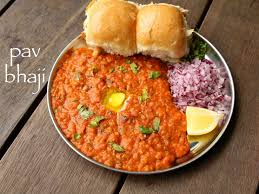
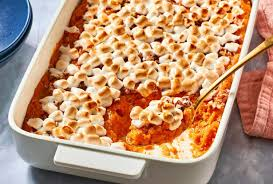
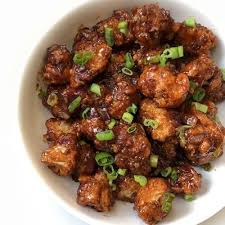
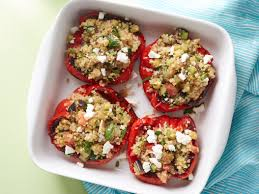
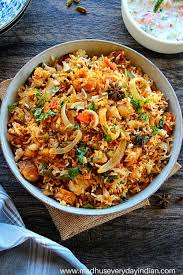

C:\Users\molly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Sample DataFrame structure: 'Food_items', 'Food_allergy', nutritional columns, 'image_url'
# Assuming 'recipe_df' contains the data (replace with your actual DataFrame)
# Example columns: 'Food_items', 'Food_allergy', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars', 'image_url'

# Preprocess the data
def preprocess_data(recipe_df):
    # Handle missing values in nutritional columns (if any)
    recipe_df = recipe_df.fillna(0)
    
    # Extract nutritional features (select the relevant nutritional columns)
    nutritional_columns = ['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 
                            'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']
    nutritional_features = recipe_df[nutritional_columns]
    
    # Normalize the nutritional features
    scaler = StandardScaler()
    nutritional_features_scaled = scaler.fit_transform(nutritional_features)
    
    return nutritional_features_scaled, scaler

# Function to recommend food items based on user nutritional input using KNN
def recommend_food_items_knn(input_features, nutritional_data, scaler, recipe_df, n_neighbors=5):
    # Step 1: Scale the user input nutritional values
    input_scaled = scaler.transform([input_features])
    
    # Step 2: Initialize KNN with the desired number of neighbors
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    
    # Step 3: Fit KNN on the scaled nutritional data
    knn.fit(nutritional_data)
    
    # Step 4: Find the nearest neighbors (most similar food items)
    distances, indices = knn.kneighbors(input_scaled)
    
    # Step 5: Retrieve the recommended food items based on the nearest neighbors' indices
    recommended_items = recipe_df.iloc[indices[0]]
    
    return recommended_items[['Food_items', 'Food_allergy', 'image_url']].to_dict(orient='records')

# Example user input (nutritional values like calories, fats, etc.)
user_input_nutritional_values = [250, 10, 5, 2, 15, 500, 400, 30, 7, 10, 20]  # Example input, replace with actual user input

# Assuming 'recipe_df' is your DataFrame with food items and nutritional values
nutritional_data_scaled, scaler = preprocess_data(recipe_df)

# Get the recommended food items based on the user's input using KNN
recommended_recipes = recommend_food_items_knn(user_input_nutritional_values, nutritional_data_scaled, scaler, recipe_df)

# Print the recommendations
if recommended_recipes:
    for recipe in recommended_recipes:
        print(f"Food Item: {recipe['Food_items']}, Allergy Info: {recipe['Food_allergy']}, Image URL: {recipe['image_url']}")
else:
    print("No valid recommendations found.")


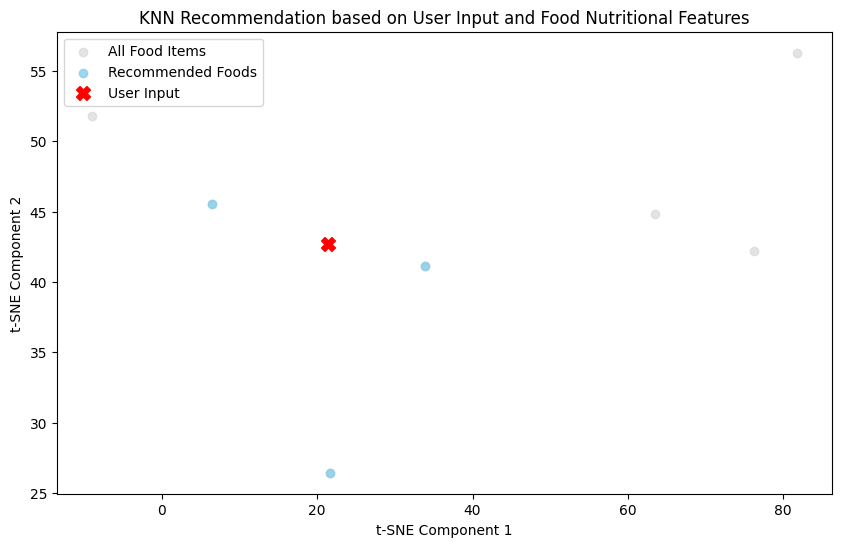

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Example data for visualization purposes (replace these with actual data)
# Assuming each food item has features like [calories, protein, fat, carbs, fiber]
# User input features (1 sample, N features)
input_features = np.array([[200, 10, 5, 30, 4]])

# Food items features (M samples, N features)
food_items = np.array([
    [210, 11, 4, 29, 3],
    [250, 15, 6, 40, 5],
    [180, 9, 7, 25, 2],
    [230, 13, 6, 35, 4],
    [190, 8, 5, 28, 3],
    [240, 12, 8, 38, 6],
    [205, 10, 5, 33, 4]
])

# Fit a KNN model on food items to find nearest neighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(food_items)

# Find the nearest neighbors for the user input
distances, indices = knn.kneighbors(input_features)
recommended_items = food_items[indices[0]]

# Combine input and food items for visualization
data = np.vstack([input_features, food_items])
data_labels = ['User Input'] + ['Food Item'] * len(food_items)

# Standardize the data for better visualization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Separate the transformed input, recommended, and non-recommended food items
input_tsne = data_tsne[0]  # User input point
food_items_tsne = data_tsne[1:]  # All food items
recommended_tsne = food_items_tsne[indices[0]]  # Recommended food items (nearest neighbors)

# Plot the data points
plt.figure(figsize=(10, 6))
# Plot all food items in light gray
plt.scatter(food_items_tsne[:, 0], food_items_tsne[:, 1], color='lightgray', label='All Food Items', alpha=0.6)
# Highlight the recommended items
plt.scatter(recommended_tsne[:, 0], recommended_tsne[:, 1], color='skyblue', label='Recommended Foods', alpha=0.8)
# Highlight the user input in red
plt.scatter(input_tsne[0], input_tsne[1], color='red', marker='X', s=100, label='User Input')

# Add labels and legend
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('KNN Recommendation based on User Input and Food Nutritional Features')
plt.legend()
plt.show()


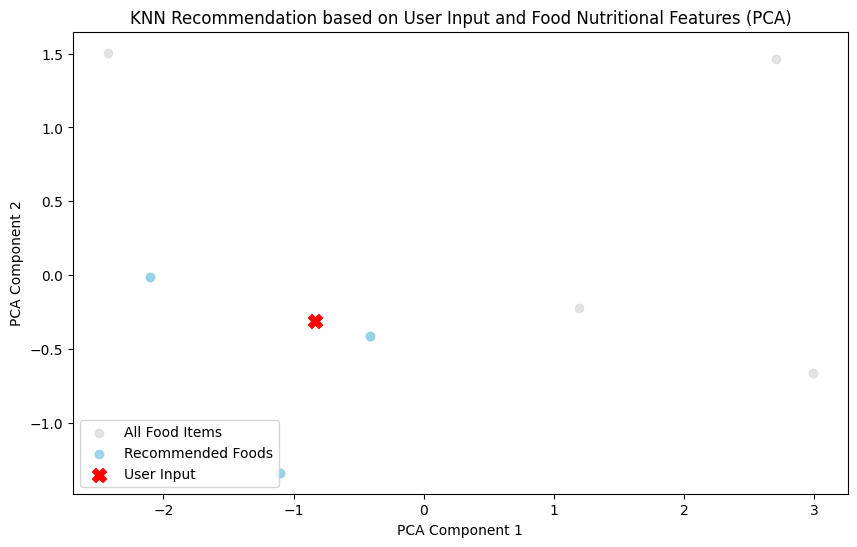

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example data (replace with actual data)
input_features = np.array([[200, 10, 5, 30, 4]])  # User input features

# Food items features (replace with actual data)
food_items = np.array([
    [210, 11, 4, 29, 3],
    [250, 15, 6, 40, 5],
    [180, 9, 7, 25, 2],
    [230, 13, 6, 35, 4],
    [190, 8, 5, 28, 3],
    [240, 12, 8, 38, 6],
    [205, 10, 5, 33, 4]
])

# Fit a KNN model on food items to find nearest neighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(food_items)

# Find the nearest neighbors for the user input
distances, indices = knn.kneighbors(input_features)
recommended_items = food_items[indices[0]]

# Combine input and food items for visualization
data = np.vstack([input_features, food_items])
data_labels = ['User Input'] + ['Food Item'] * len(food_items)

# Standardize the data for better visualization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Separate the transformed input, recommended, and non-recommended food items
input_pca = data_pca[0]  # User input point
food_items_pca = data_pca[1:]  # All food items
recommended_pca = food_items_pca[indices[0]]  # Recommended food items (nearest neighbors)

# Plot the data points
plt.figure(figsize=(10, 6))
# Plot all food items in light gray
plt.scatter(food_items_pca[:, 0], food_items_pca[:, 1], color='lightgray', label='All Food Items', alpha=0.6)
# Highlight the recommended items
plt.scatter(recommended_pca[:, 0], recommended_pca[:, 1], color='skyblue', label='Recommended Foods', alpha=0.8)
# Highlight the user input in red
plt.scatter(input_pca[0], input_pca[1], color='red', marker='X', s=100, label='User Input')

# Add labels and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KNN Recommendation based on User Input and Food Nutritional Features (PCA)')
plt.legend()
plt.show()


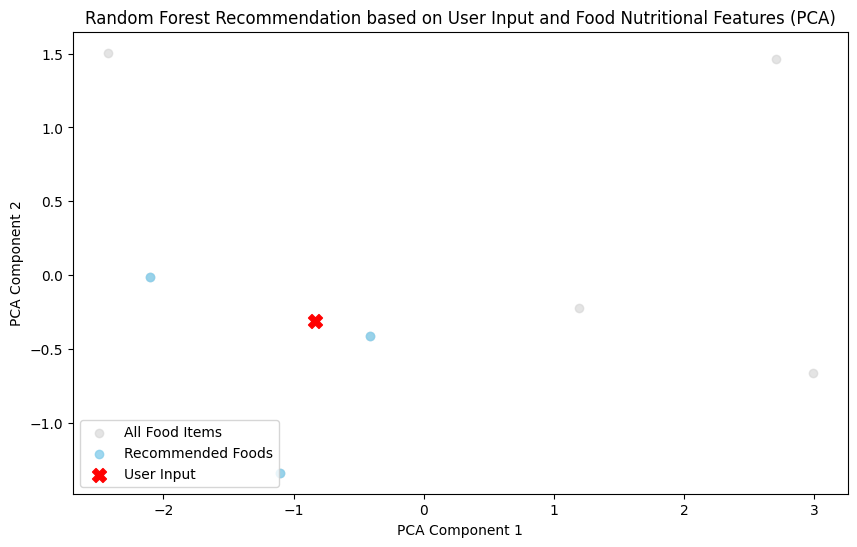

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example data (replace with actual data)
input_features = np.array([[200, 10, 5, 30, 4]])  # User input features

# Food items features (replace with actual data)
food_items = np.array([
    [210, 11, 4, 29, 3],
    [250, 15, 6, 40, 5],
    [180, 9, 7, 25, 2],
    [230, 13, 6, 35, 4],
    [190, 8, 5, 28, 3],
    [240, 12, 8, 38, 6],
    [205, 10, 5, 33, 4]
])

# Labels for food items (you can use categories or simply unique identifiers for each item)
food_labels = np.array([0, 1, 2, 3, 4, 5, 6])  # Replace with actual labels if available

# Fit a Random Forest model on food items
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(food_items, food_labels)

# Predict the closest items by finding the probability of each class (food item) for the user input
proba = rf_model.predict_proba(input_features)[0]
top_indices = np.argsort(proba)[-3:]  # Get top 3 similar items
recommended_items = food_items[top_indices]

# Combine input and food items for visualization
data = np.vstack([input_features, food_items])
data_labels = ['User Input'] + ['Food Item'] * len(food_items)

# Standardize the data for better visualization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Separate the transformed input, recommended, and non-recommended food items
input_pca = data_pca[0]  # User input point
food_items_pca = data_pca[1:]  # All food items
recommended_pca = food_items_pca[top_indices]  # Recommended food items (closest in Random Forest prediction)

# Plot the data points
plt.figure(figsize=(10, 6))
# Plot all food items in light gray
plt.scatter(food_items_pca[:, 0], food_items_pca[:, 1], color='lightgray', label='All Food Items', alpha=0.6)
# Highlight the recommended items
plt.scatter(recommended_pca[:, 0], recommended_pca[:, 1], color='skyblue', label='Recommended Foods', alpha=0.8)
# Highlight the user input in red
plt.scatter(input_pca[0], input_pca[1], color='red', marker='X', s=100, label='User Input')

# Add labels and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Random Forest Recommendation based on User Input and Food Nutritional Features (PCA)')
plt.legend()
plt.show()
